#Hackathon Subject 2: Analyzing Medical Insurance Costs

Description:

In this hackathon, you are tasked with analyzing medical insurance costs based on various factors such as age, gender, BMI, number of dependents, smoking habits, and residential region. As a data analyst working in the health insurance sector, your goal is to explore the “Medical Cost Personal Datasets” to uncover patterns and insights that could inform pricing strategies, risk assessment, and personalized health care planning.

This dataset allows you to investigate the relationships between demographic and lifestyle factors with medical expenses, offering valuable insights into the key drivers of insurance costs.

Data source: Medical Cost Personal Datasets

Key Tasks:

##Exploratory Data Analysis (EDA):

1. Perform a comprehensive analysis of the dataset to understand the distribution of variables and identify any correlations between features such as age, BMI, smoking status, and medical costs (charges).
2. Use descriptive statistics and visualizations to summarize the data and highlight any interesting trends or outliers.

##Data Preprocessing:

1. Handle missing data and perform any necessary data cleaning.
2. Apply normalization or standardization to numerical features like age, bmi, and charges to prepare them for analysis.
3. Encode categorical variables such as sex, smoker, and region to facilitate further analysis.

##Feature Exploration:

1. Explore the impact of different features on medical costs, focusing on key variables like BMI, smoking status, and the number of dependents.
2. Investigate potential interactions between variables and how they influence insurance charges using correlation matrix and graphs.

##Visualization:

1. Use Matplotlib and Seaborn to create visualizations that effectively communicate your findings. Examples might include scatter plots, box plots, heatmaps, and bar charts. You can also directly create them on Tableau or PowerBI.
2. Optionally, develop an interactive dashboard using Tableau or PowerBI to allow stakeholders to explore the data and insights dynamically.

##Bonus: Regional Analysis:

1. Conduct a detailed analysis of how medical costs vary by region (northeast, southeast, southwest, northwest).
2. Identify any regional trends in medical expenses and suggest reasons for these variations.

##Deliverables:

Participants are expected to submit a comprehensive report detailing their exploratory data analysis, data preprocessing steps, and key insights. Additionally, a presentation should be prepared to showcase the visualizations and conclusions. An interactive dashboard is optional but can enhance the presentation of results.

Evaluation Criteria:

Judges will assess submissions based on the depth of analysis, creativity in data exploration, the clarity and effectiveness of visualizations, and the overall quality of insights and recommendations derived from the data.

#Analyzing Medical Insurance Costs - an analysis

###1. This is a regression problem so we will need the necessary models and metrics relevant to a regression problem - I can try quite a few models and starting with Linear Regression we can also add Lasso and ElasticNet as recommended by the SciKit-Learn algorithm for choosing an appropriate estimator.
###2. I will also add XGBoost and Random Forest based on previous experience.
###3. On the basis of the EDA I will decide whether I should consider also SVR with linear kernel or SVR with rbf kernel and perhaps also Ridge

In [1]:
# Import the main libraries to use
# General and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import ttest_ind, pearsonr, f_oneway, linregress

# Data splitting, preprocessing and tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
import sys

print(f"Python Version: {sys.version}")

# Dictionary of common libraries to check, mapping import name to its attribute name if different
common_libraries = {
    'numpy': 'numpy',
    'pandas': 'pandas',
    'matplotlib': 'matplotlib',
    'seaborn': 'seaborn',
    'scipy': 'scipy',
    'sklearn': 'sklearn',
    'xgboost': 'xgboost',
    'imblearn': 'imblearn' # often imported as imblearn
}

for lib_import_name, lib_attr_name in common_libraries.items():
    try:
        # Try to import the module
        module = __import__(lib_import_name)
        # Access the __version__ attribute directly from the imported module
        version = getattr(module, '__version__', 'Version Not Found')
        print(f"{lib_import_name}: {version}")
    except ImportError:
        print(f"{lib_import_name}: Not Found (or not installed)")
    except Exception as e:
        print(f"Could not get version for {lib_import_name}: {e}")


Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
numpy: 2.0.2
pandas: 2.2.2
matplotlib: 3.10.0
seaborn: 0.13.2
scipy: 1.16.3
sklearn: 1.6.1
xgboost: 3.1.1
imblearn: 0.14.0


##Import the data and explore it

In [ ]:
# Import the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/insurance.csv')
display(df.head())
display(df.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

**There are no missing values**

In [ ]:
# We will explore the information for numeric columns to see outliers and means
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# We will explore the value counts for the non_numeric columns
display(df['sex'].value_counts())
display(df['smoker'].value_counts())
display(df['region'].value_counts())

,count
sex,
male,676
female,662


,count
smoker,
no,1064
yes,274


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
# Although there were no missing values when we ran the info() method we can
# double check using the isna() method
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


##EDA - Exploratory Data Analysis

##Univariate Analysis

###1. Age and medical charges

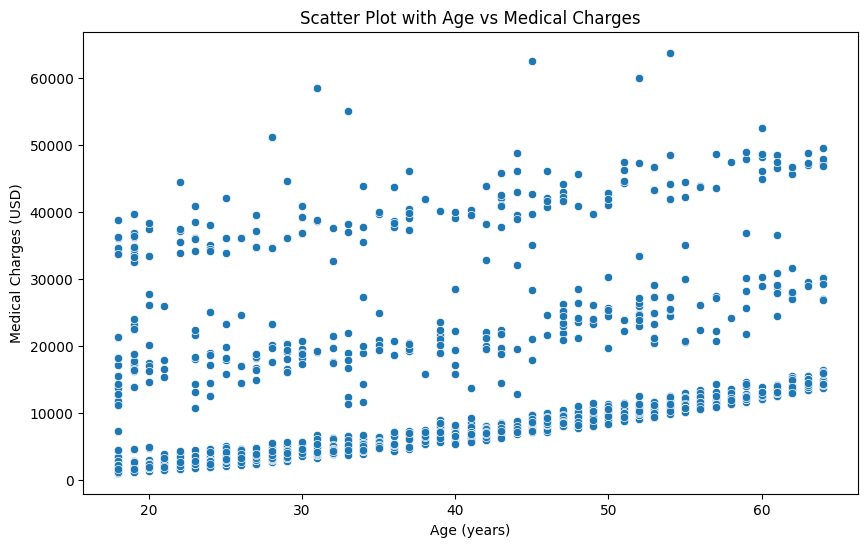

In [ ]:
# Examine the Age correlation with Charges
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.scatterplot(data=df,x='age',y='charges')
ax.set(title='Scatter Plot with Age vs Medical Charges',
       xlabel='Age (years)',ylabel='Medical Charges (USD)')
plt.show()

**There seem to be 3 groups of data points on the scatter plot**

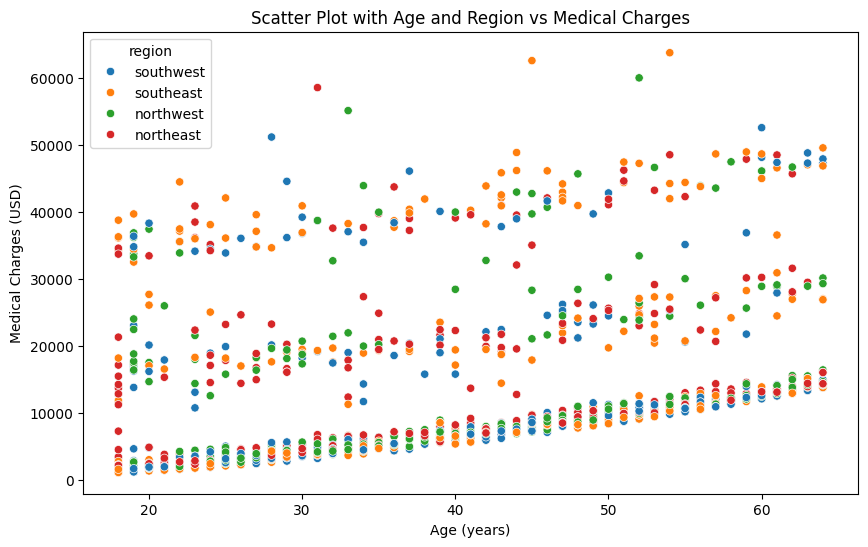

In [ ]:
# To analyze this observation we will do the plot again differentiating by the
# category that has more than one category - region
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.scatterplot(data=df,x='age',y='charges',hue=df['region'])
ax.set(title='Scatter Plot with Age and Region vs Medical Charges',
       xlabel='Age (years)',ylabel='Medical Charges (USD)')
plt.show()

**That did not help much - but we can try again using sex or smoking status or number of children**

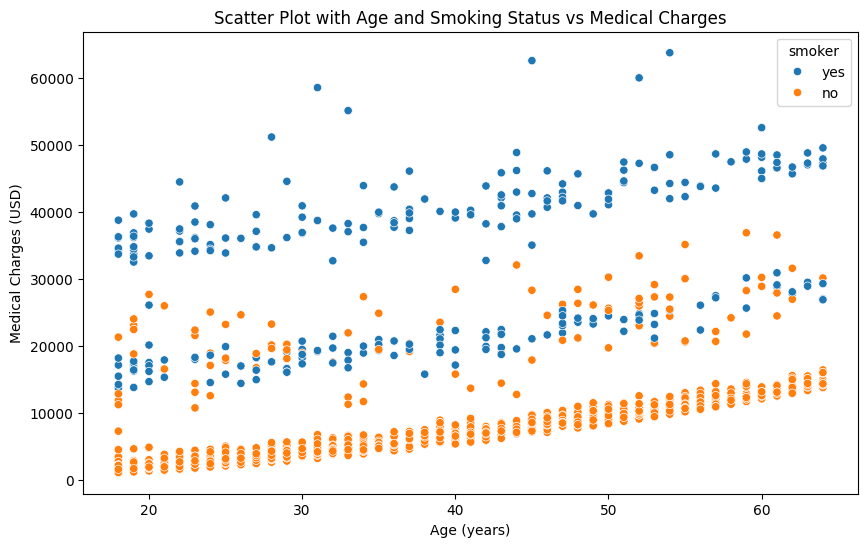

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.scatterplot(data=df,x='age',y='charges',hue=df['smoker'])
ax.set(title='Scatter Plot with Age and Smoking Status vs Medical Charges',
       xlabel='Age (years)', ylabel='Medical Charges (USD)')
plt.show()

**Excellent separation using smoking status - we don't yet have a good explanation to the feature which creates a distinct group between the smokers and non smokers**

###Before we move on to the other features we will have a look at the difference in means between charges for smokers vs non-smokers to see if it is statistically significant

###2. Smoking and medical charges
1. The null hypothesis (H0) is there is no difference between the mean charges of smokers and non-smokers
2. The alternative hypothesis (H1) is that there is a difference in mean charges of smokers and non-smokers

**The plot suggests that not smoking is correlated with lower charges so we can perform a one-sided t-test to examine statistical significance**

In [ ]:
# examine the difference between the means

non_smoker_df=df['charges'][df['smoker']=='no']
smoker_df=df['charges'][df['smoker']=='yes']

non_smoker_mean=np.mean(non_smoker_df)
smoker_mean=np.mean(smoker_df)

print(f'The mean for Non-Smoker charges is {non_smoker_mean:.2f}')
print(f'The mean for Smoker charges is {smoker_mean:.2f}')

The mean for Non-Smoker charges is 8434.27
The mean for Smoker charges is 32050.23


In [ ]:
# Examine the statistical significance of the difference in means
t_stat, p_value =ttest_ind(smoker_df, non_smoker_df, alternative='greater')

print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print("The p value we got in the t-test is lower than alpha so we can say\n"
    'that the observed difference is not likely the result of a random variation')
else:
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("The p value we got in the t-test is bigger than alpha so we can say\n"
    'that the observed difference could be the result of a random variation')


Results:
T-statistic: 46.6649
P-value: 0.000000

Conclusion: Reject H0 (p < 0.05)
The p value we got in the t-test is lower than alpha so we can say
that the observed difference is not likely the result of a random variation


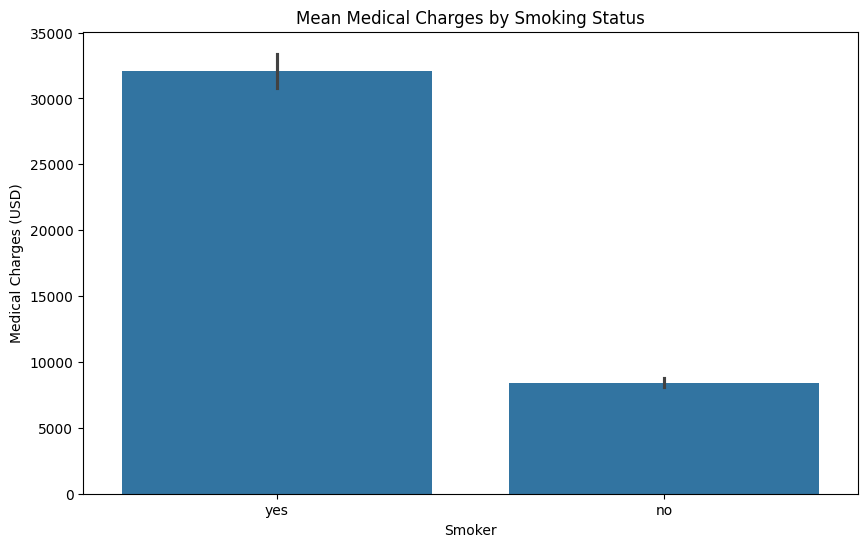

In [ ]:
# Visualization of smoking and medical charges
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.barplot(data=df, x='smoker', y='charges')
ax.set(title='Mean Medical Charges by Smoking Status',
       xlabel='Smoker',ylabel='Medical Charges (USD)')
plt.show()

###3. Sex and medical charges

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


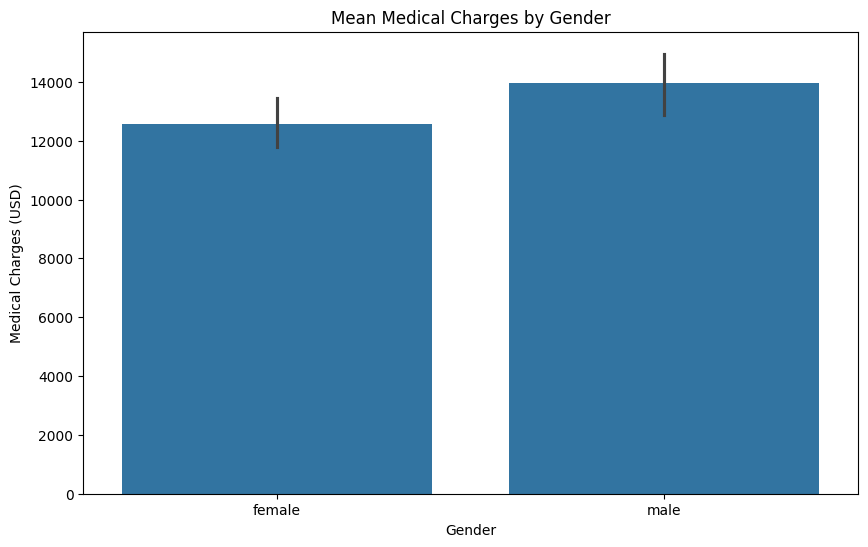

In [ ]:
# We will examine the difference in charges between males and females
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.barplot(data=df, x='sex', y='charges')
ax.set(title='Mean Medical Charges by Gender', xlabel='Gender',
       ylabel='Medical Charges (USD)')
plt.show()

In [ ]:
# We can check if there is a statistical difference between the mean charges for
# male and female

male_df=df['charges'][df['sex']=='male']
female_df=df['charges'][df['sex']=='female']

male_mean=np.mean(male_df)
female_mean=np.mean(female_df)

print(f'The mean for Male charges is {male_mean:.2f}')
print(f'The mean for Female charges is {female_mean:.2f}')

t_stat, p_value =ttest_ind(female_df, male_df, alternative='less')

print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

The mean for Male charges is 13956.75
The mean for Female charges is 12569.58

Results:
T-statistic: -2.0975
P-value: 0.018066


###We skipped for practical purposes the structure of null hypothesis vs alternative - the p-value we got is smaller than 0.05 so we can say that females have a statistically significant lower mean charges compared to males mean charges

###4. BMI and medical charges

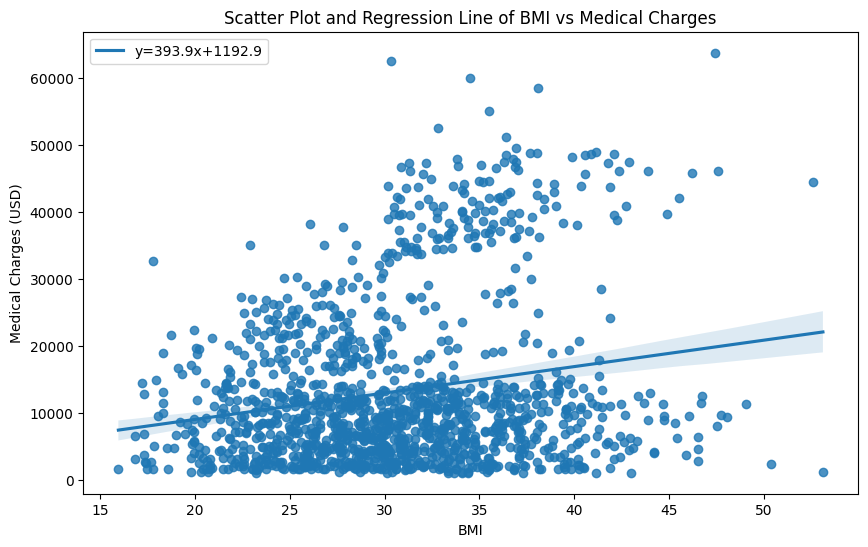

In [ ]:
# Examine the BMI correlation with Charges
slope, intercept, r_value, p_value, std_err = linregress(df["bmi"], df["charges"])
fig, ax= plt.subplots(figsize=(10,6))
ax = sns.regplot(x="bmi", y="charges", data=df,
                 line_kws={"label": f"y={slope:.1f}x+{intercept:.1f}"})
ax.set(title='Scatter Plot and Regression Line of BMI vs Medical Charges',
       xlabel='BMI', ylabel='Medical Charges (USD)')
ax.legend()
plt.show()

In [ ]:
# Perform correlation test for BMI and Medical Charges:
correlation_coef, p_value_corr = pearsonr(df['bmi'], df['charges'])

print(f"\nResults:")
print(f"Correlation coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value_corr}")


Results:
Correlation coefficient: 0.1983
P-value: 2.4590855351167345e-13


**the p-value we got is smaller than 0.05 so we can say that there is a correlation between BMI and medical charges - however the correlation is very weak with a coefficient of approximately 0.2 although it is statistically significant with the p value being so small**

###5. Number of children and medical charges

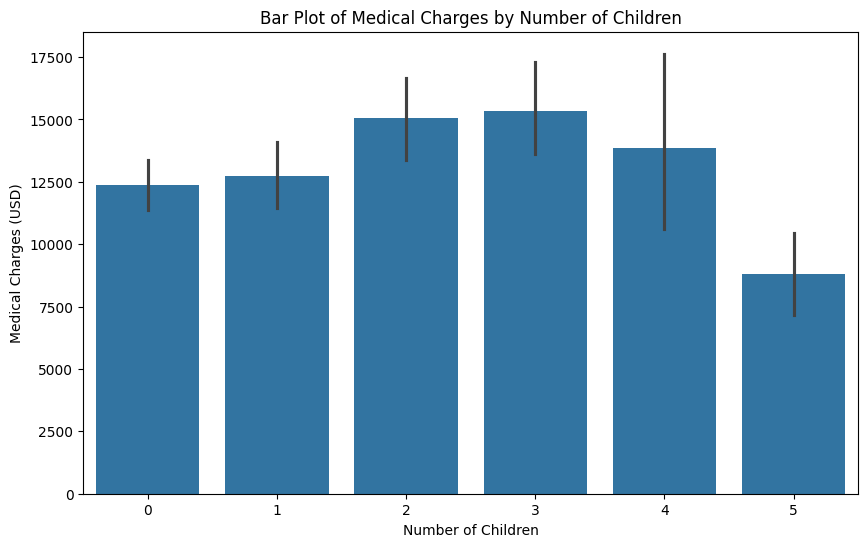

In [ ]:
# We will examine the difference in charges by number of children
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.barplot(data=df,x='children',y='charges')
ax.set(title='Bar Plot of Medical Charges by Number of Children',
       xlabel='Number of Children',ylabel='Medical Charges (USD)')
plt.show()

In [ ]:
# To examine if there is a statistical difference between the categories we will
# use one-way ANOVA although arguably number of children could also be considered
# ordered categories so a Cochran_Armitage test may be more relevant

children={}
for i in np.sort(df['children'].unique()):
  children[i]=df['charges'][df['children']==i]

# Filter out groups with only one sample
filtered_children = {key: value for key, value in children.items() if len(value) > 1}


f_stat, p_val = f_oneway(*filtered_children.values())
print(f"ANOVA test: F={f_stat}, p={p_val}")

ANOVA test: F=3.296920166720223, p=0.00578568138087587


**We can see that there is a statistically significant difference between the mean charges between the different categories of number of children - p value is less than 0.05**

###6. Number of children and medical charges

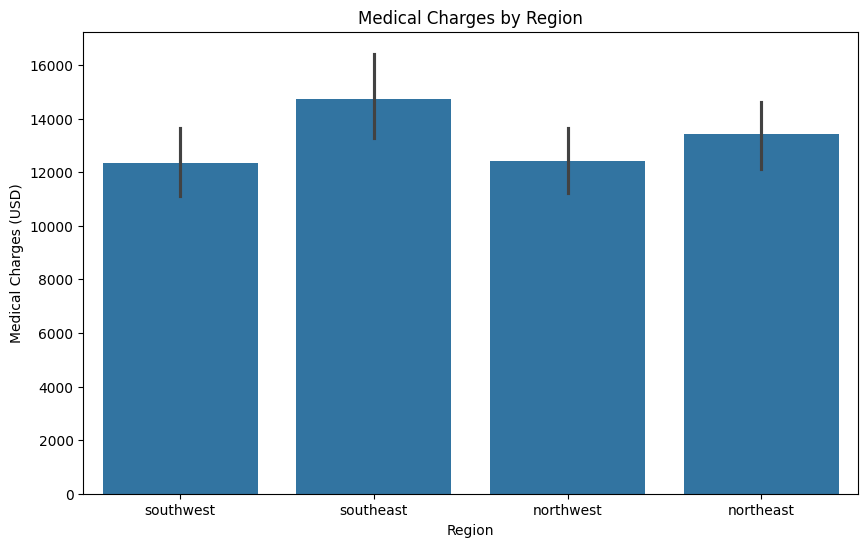

In [ ]:
# We will examine the difference in charges by region
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.barplot(data=df,x='region',y='charges')
ax.set(title='Medical Charges by Region', xlabel='Region',
       ylabel='Medical Charges (USD)')
plt.show()

In [ ]:
# We will examine for statistical significance using ANOVA.
# In this case the categories are not ordinal so one-way f test should be fine

regions={}
for region in np.sort(df['region'].unique()):
  regions[region]=df['charges'][df['region']==region]

f_stat, p_val = f_oneway(*regions.values())
print(f"ANOVA test: F={f_stat}, p={p_val}")

ANOVA test: F=2.9696266935891193, p=0.0308933560705201


**We can see that there is a statistically significant difference between the mean charges between the different categories of number of children - p value is less than 0.05 - but only marginally**

##Multivariate Analysis

We already did a multivariate analysis for age and smoking status vs medical charges but we will add a correlation matrix for the numeric variables

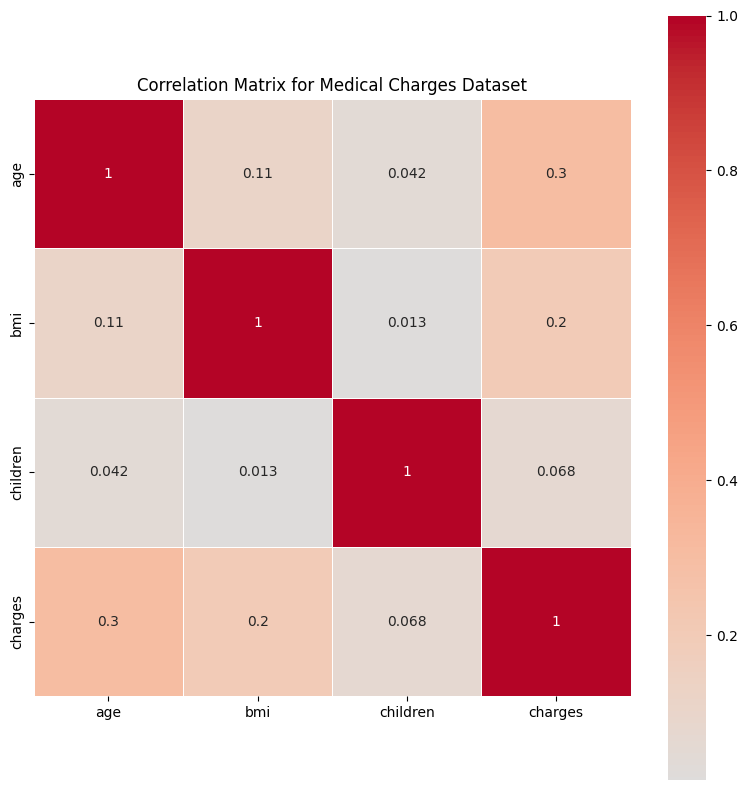

In [ ]:
# Create correlation matrix
correlation_matrix=df.corr(numeric_only=True)

fig,ax=plt.subplots(figsize=(8,8))
ax=sns.heatmap(data=correlation_matrix,annot=True, cmap='coolwarm', center=0,
               square=True, linewidths=0.5)
ax.set(title='Correlation Matrix for Medical Charges Dataset')
plt.tight_layout()
plt.show()

##Machine Learning models

###We will have several steps which we will tie together using a pipeline to assess several models

In [ ]:
# le't set a dictionary for the models we will use

regression_models={'Linear Regression':LinearRegression(),
                   'Lasso':Lasso(),
                   'ElasticNet':ElasticNet(),
                   'Linear SVR':LinearSVR(),
                   'SVR':SVR(),
                   'Random Forest':RandomForestRegressor(random_state=42),
                   'XGBoost':XGBRegressor(random_state=42)}

####1. Splitting the data into X&y and then into training and test datasets

In [ ]:
# Split the data into X&y

X=df.drop('charges',axis=1)
y=df['charges']

# Split the data into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

display(X_train.shape, X_test.shape)

(1070, 6)

(268, 6)

####2. Preprocessing - encoding and handling missing values (unnecessary in this case)

In [ ]:
# We will need to encode the categorical features and the binary features to
# numeric and scale the numeric data

binary_features=['sex','smoker']
categorical_features=['region']
numeric_features=['age','bmi','children']

# Create transformers for each type of features
binary_transformer=Pipeline(steps=[
    ('ordinal',OrdinalEncoder(categories=[['female','male'],['no','yes']]))
])

categorical_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])


numeric_transformer=Pipeline(steps=[
    ('scaler',StandardScaler())
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_features),
        ('categorical', categorical_transformer, categorical_features),
        ('numeric', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

####3. Model training and scoring

In [ ]:
# Introducing the models into the pipeline and fitting and scoring them

regression_results={}

for model_name, model in regression_models.items():

    # Create a model Pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])

    # Fit the model Pipeline to the training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(X_train, y_train)

    # Evaluate the model Pipeline on the test data
    print(f"Evaluating {model_name}...")

    r2 = model_pipeline.score(X_test, y_test)

    # Make predictions for MAE calculation
    y_pred = model_pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)


    regression_results[model_name] = {'R2': r2, 'MAE': mae, 'MSE': mse}

# Print the results
metrics = pd.DataFrame(regression_results)
print(metrics)



Fitting Linear Regression...
Evaluating Linear Regression...
Fitting Lasso...
Evaluating Lasso...
Fitting ElasticNet...
Evaluating ElasticNet...
Fitting Linear SVR...
Evaluating Linear SVR...
Fitting SVR...
Evaluating SVR...
Fitting Random Forest...
Evaluating Random Forest...
Fitting XGBoost...
Evaluating XGBoost...
     Linear Regression         Lasso    ElasticNet    Linear SVR  \
R2        7.835930e-01  7.835381e-01  3.940996e-01 -8.210015e-01   
MAE       4.181194e+03  4.182022e+03  7.535995e+03  1.142586e+04   
MSE       3.359692e+07  3.360544e+07  9.406527e+07  2.827082e+08   

              SVR  Random Forest       XGBoost  
R2  -7.156877e-02   8.643220e-01  8.484853e-01  
MAE  8.608616e+03   2.549567e+03  2.685788e+03  
MSE  1.663597e+08   2.106383e+07  2.352246e+07  


####4. Selecting best performing model

In [ ]:
# Identify the best performing model for each metric
best_r2_model = max(regression_results, key=lambda model: regression_results[model]['R2'])
best_mae_model = min(regression_results, key=lambda model: regression_results[model]['MAE'])
best_mse_model = min(regression_results, key=lambda model: regression_results[model]['MSE'])

print(f"Best model based on R2: {best_r2_model} (R2: {regression_results[best_r2_model]['R2']:.4f})")
print(f"Best model based on MAE: {best_mae_model} (MAE: {regression_results[best_mae_model]['MAE']:.2f})")
print(f"Best model based on MSE: {best_mse_model} (MSE: {regression_results[best_mse_model]['MSE']:.2f})")

Best model based on R2: Random Forest (R2: 0.8643)
Best model based on MAE: Random Forest (MAE: 2549.57)
Best model based on MSE: Random Forest (MSE: 21063830.65)


####5. Tuning the hyperparameters of the best performing model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline with the preprocessor and Random Forest model
rf_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                              ("model", RandomForestRegressor(random_state=42))])

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit GridSearchCV to the training data
print("Tuning hyperparameters for Random Forest...")
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest hyperparameters found:")
print(best_params)
print(f"\nBest cross-validation score (negative MAE): {best_score:.2f}")

# Evaluate the best model on the test data
best_rf_model = grid_search.best_estimator_
test_score_r2 = best_rf_model.score(X_test, y_test)
y_pred = best_rf_model.predict(X_test)
test_score_mae = mean_absolute_error(y_test, y_pred)
test_score_mse = mean_squared_error(y_test, y_pred)


print(f"\nTest set R2 score: {test_score_r2:.4f}")
print(f"Test set MAE: {test_score_mae:.2f}")
print(f"Test set MSE: {test_score_mse:.2f}")

Tuning hyperparameters for Random Forest...

Best hyperparameters found:
{'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 100}

Best cross-validation score (negative MAE): -2622.86

Test set R2 score: 0.8775
Test set MAE: 2427.77
Test set MSE: 19010468.42


####6. Feature importance analysis

Feature Importances (Tuned Random Forest Model):
smoker              0.657020
bmi                 0.193670
age                 0.126981
children            0.011470
region_northeast    0.003145
sex                 0.002820
region_southeast    0.001717
region_northwest    0.001702
region_southwest    0.001474
dtype: float64


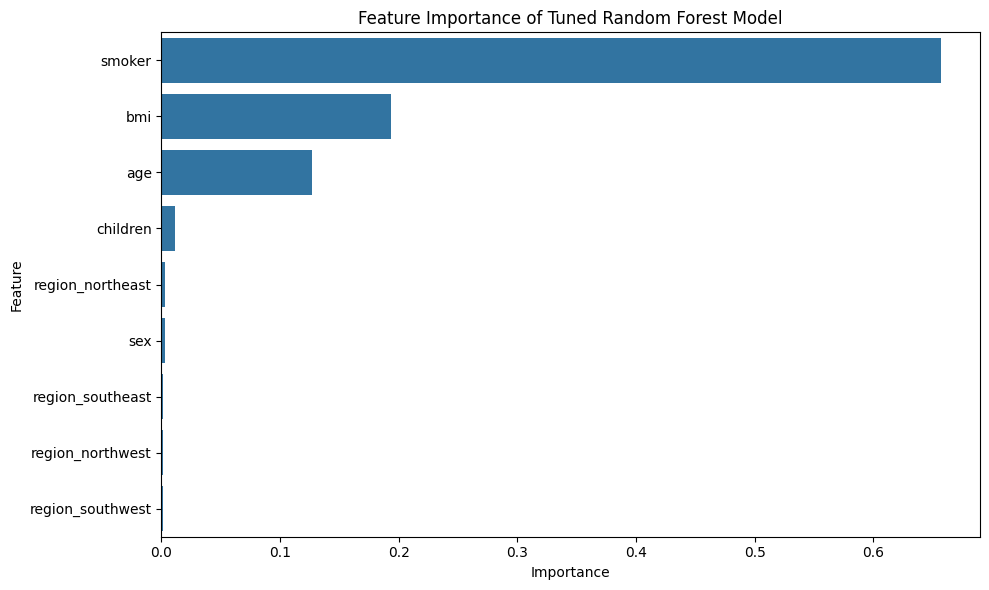

In [ ]:
# Get the feature importances from the best Random Forest model
feature_importances = best_rf_model.named_steps['model'].feature_importances_

# Get the names of the features after preprocessing
# This requires accessing the column transformer and its transformers
preprocessor = best_rf_model.named_steps['preprocessor']

# Get feature names from the binary and numeric transformers
binary_feature_names = binary_features
numeric_feature_names = numeric_features

# Get feature names from the one-hot encoder
# The get_feature_names_out() method is available after fitting the transformer
categorical_feature_names = list(preprocessor.named_transformers_['categorical'].get_feature_names_out(categorical_features))

# Combine all feature names in the correct order
all_feature_names = binary_feature_names + categorical_feature_names + numeric_feature_names

# Create a pandas Series for better visualization
importance_series = pd.Series(feature_importances, index=all_feature_names)

# Sort the features by importance
sorted_importance_series = importance_series.sort_values(ascending=False)

# Print or visualize the feature importances
print("Feature Importances (Tuned Random Forest Model):")
print(sorted_importance_series)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance_series.values, y=sorted_importance_series.index)
plt.title('Feature Importance of Tuned Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#We could dive deeper into the regional analysis but it is not an important feature of the model so it doe not seem particularly efficient to dive deeper into that feature.

####Additional investigation of the interaction between BMI, age and smoking and impact on charges

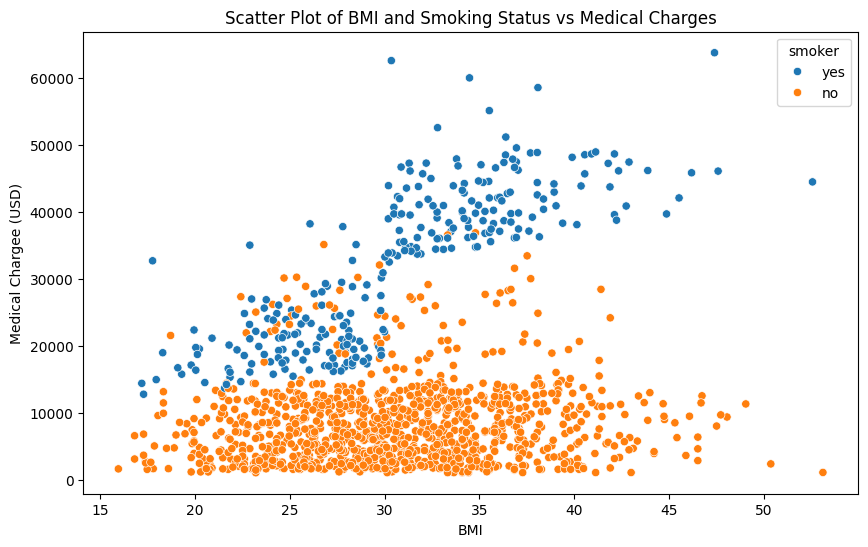

In [ ]:
# BMI and smoking status vs charges
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
ax.set(title='Scatter Plot of BMI and Smoking Status vs Medical Charges',
       xlabel='BMI',
       ylabel='Medical Chargee (USD)')
plt.show()

# Analysis of Medical Insurance Costs

## Introduction and Objective

This notebook analyzes the "Medical Cost Personal Datasets" to explore factors influencing individual medical insurance costs. The objective is to identify patterns and insights that can inform pricing strategies and risk assessment in the health insurance sector.

## Data Loading and Initial Exploration

The dataset was loaded into a pandas DataFrame. Initial checks confirmed that there were no missing values. The dataset includes features such as age, sex, BMI, number of children, smoking status, region, and the target variable, medical charges.

## Exploratory Data Analysis (EDA)

Comprehensive EDA was performed to understand variable distributions and relationships with medical charges:

*   **Age:** A general positive correlation was observed, with charges tending to increase with age. Scatter plots revealed distinct bands, particularly when considering smoking status.
*   **Smoking Status:** Smoking was found to be the most significant factor influencing charges, with smokers having substantially higher mean charges than non-smokers (statistically significant difference confirmed by t-test, p < 0.001).
*   **Sex:** A small but statistically significant difference in mean charges was observed between males and females (females having slightly lower mean charges, p < 0.05).
*   **BMI:** A weak but statistically significant positive correlation was found between BMI and charges (correlation coefficient ≈ 0.2, p < 0.001).
*   **Number of Children:** ANOVA test indicated a statistically significant difference in mean charges across different numbers of children (p < 0.05).
*   **Region:** ANOVA test also showed a statistically significant difference in mean charges across different regions, although this difference was marginal (p < 0.05).

Multivariate analysis, particularly focusing on age and smoking status, highlighted the strong impact of smoking on charges across all age groups.

## Data Preprocessing

Data preprocessing involved:

*   Splitting the data into training and testing sets (80/20 split).
*   Using a `ColumnTransformer` to apply different transformations to different feature types:
    *   Ordinal Encoding for binary features (`sex`, `smoker`).
    *   One-Hot Encoding for the categorical feature (`region`).
    *   Standard Scaling for numerical features (`age`, `bmi`, `children`).

## Model Building and Evaluation

Several regression models were evaluated using a pipeline that included the preprocessing steps. The models assessed were:

*   Linear Regression
*   Lasso
*   ElasticNet
*   Linear SVR
*   SVR
*   Random Forest Regressor
*   XGBoost Regressor

Initial evaluation on the test set using R2, MAE, and MSE metrics showed that the **Random Forest Regressor** and **XGBoost Regressor** performed best, with Random Forest having slightly better scores across the board (R2 ≈ 0.86, MAE ≈ 2550).

## Model Tuning and Selection

Hyperparameter tuning was performed on the best-performing model, the Random Forest Regressor, using `GridSearchCV` with a focus on optimizing the Mean Absolute Error (using negative MAE scoring).

The tuning process identified the following optimal hyperparameters:
*   `max_depth`: 10
*   `min_samples_leaf`: 4
*   `min_samples_split`: 2
*   `n_estimators`: 100

Evaluating the tuned Random Forest model on the test set yielded improved performance:
*   **Test set R2 score:** 0.8775
*   **Test set MAE:** 2427.77
*   **Test set MSE:** 19010468.42

The tuned Random Forest model demonstrates a strong ability to predict medical charges based on the provided features.

## Feature Importance

Analysis of the feature importances from the tuned Random Forest model revealed the relative contribution of each feature to the predictions:

*   **Smoker** was overwhelmingly the most important feature.
*   **BMI** and **Age** were the next most important features.
*   **Children** and **Region** had considerably lower importance.

This confirms that smoking status is the primary driver of medical costs in this dataset, followed by BMI and age.

## Conclusion and Insights

The analysis highlights that **smoking status, BMI, and age** are the most significant factors influencing medical insurance charges. While sex, number of children, and region show statistically significant relationships with charges, their impact is considerably less compared to smoking, BMI, and age in the developed model.

The tuned Random Forest Regressor model provides a robust tool for predicting medical costs, with an average absolute error of approximately 2428 USD on unseen data. These findings can be valuable for understanding risk factors and potentially informing insurance pricing and health intervention strategies. Further analysis could explore interaction effects in more detail and potentially investigate the unexplained variance in the middle charge band.